In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix
from dpks.differential_testing import DifferentialTest

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv",
)

/Users/erikhartman/dev/DPKS/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/erikhartman/dev/DPKS/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
quantified_data = (
    quant_matrix.filter().normalize(
        method="mean",
        log_transform=True,
        use_rt_sliding_window_filter=True,
        minimum_data_points=100,
        stride=5,
        use_overlapping_windows=True,
        rt_unit="minutes",
    ).scale("minmax")
    # .quantify(method="top_n", top_n=1)
)
quantified_data.to_df()

/Users/erikhartman/dev/DPKS/dpks/scaling.py:84: RuntimeWarning: invalid value encountered in divide
  return np.array((X - mins[:, None]) / (maxes[:, None] - mins[:, None]))


,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,AAS_P2009_167,AAS_P2009_169,AAS_P2009_176,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,NaN,0.331401,NaN,...,0.086736,NaN,0.129059,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,NaN,NaN,NaN,...,0.767779,NaN,0.862130,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,0.000000,1.000000,NaN,...,0.713388,0.246445,0.795802,0.309464,0.772509,0.286028,0.646827,0.808107,0.205616,0.413769
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,NaN,NaN,NaN,...,NaN,0.116911,0.507332,0.000000,0.723514,0.002494,NaN,0.560133,0.103130,0.218192
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
compared_data = quantified_data.compare(
    method="anova",
    comparisons=(4, 6),
    min_samples_per_group=2,
    level="precursor",
    multiple_testing_correction_method="fdr_tsbh",
)

compared_data.to_df()

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,PrecursorId,DEScore4-6,Group4Mean,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,TGTLTTSETAHNM(UniMod:35)K_3,NaN,NaN,...,0.086736,NaN,0.129059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,THNDIIHNENM(UniMod:35)R_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,DSVTYTEHAK_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,IHMGNC(UniMod:4)AENTAK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NDC(UniMod:4)GDYSDER_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,AMDFDRDVLSALAEVEQLSK_3,NaN,NaN,...,0.767779,NaN,0.862130,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR_3,0.105954,0.604605,...,0.713388,0.246445,0.795802,0.309464,0.772509,0.286028,0.646827,0.808107,0.205616,0.413769
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,SNLVGMGVIPLEYLPGETADSLGLTGR_3,0.124316,0.322038,...,NaN,0.116911,0.507332,NaN,0.723514,0.002494,NaN,0.560133,0.103130,0.218192
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,LFSGEDVLYEGDSIVYPVFINEAAYYEK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Log2FoldChange4-6', ylabel='-Log10CorrectedPValue4-6'>

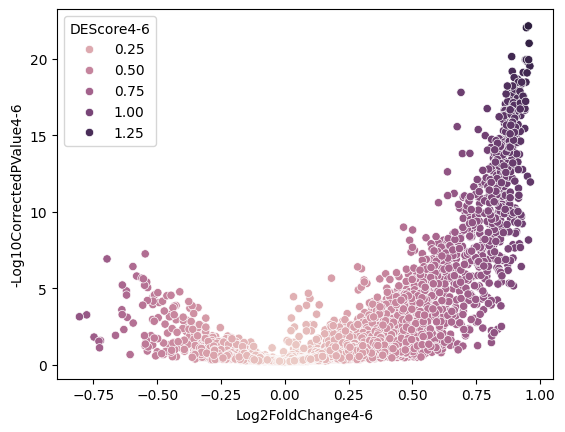

In [4]:
import seaborn as sns
import numpy as np



sns.scatterplot(
    data=compared_data.row_annotations,
    x="Log2FoldChange4-6",
    y="-Log10CorrectedPValue4-6",
    hue="DEScore4-6",
)

In [5]:
compared_data.row_annotations["Species"] = np.where(
    compared_data.row_annotations["Protein"].str.contains("MOUSE"),
    "MOUSE",
    np.where(
        compared_data.row_annotations["Protein"].str.contains("YEAST"),
        "YEAST",
        np.where(
            compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE"
        ),
    ),
)

<Axes: xlabel='Group6Mean', ylabel='Log2FoldChange4-6'>

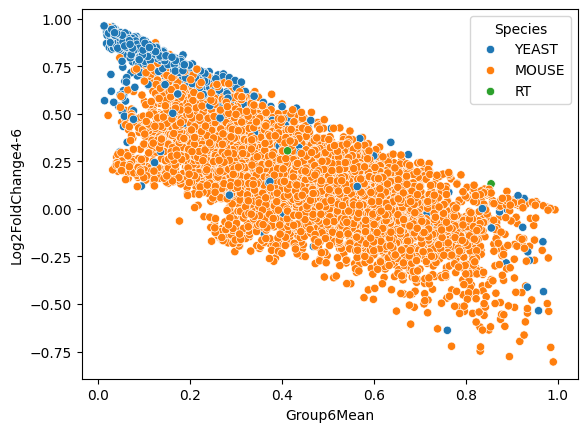

In [6]:
sns.scatterplot(
    data=compared_data.row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
)

In [7]:
cutoffs = np.linspace(0.0, 1.0, num=10000)

In [8]:
precision_roc_data = []

for cutoff in cutoffs[1:]:
    yeast_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    yeast_fn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    mouse_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    mouse_tn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    recall = yeast_ids / (yeast_ids + yeast_fn)

    precision = yeast_ids / (yeast_ids + mouse_ids)
    fpr = mouse_ids / (mouse_ids + mouse_tn)

    precision_roc_data.append({"recall": recall, "precision": precision, "fpr": fpr})

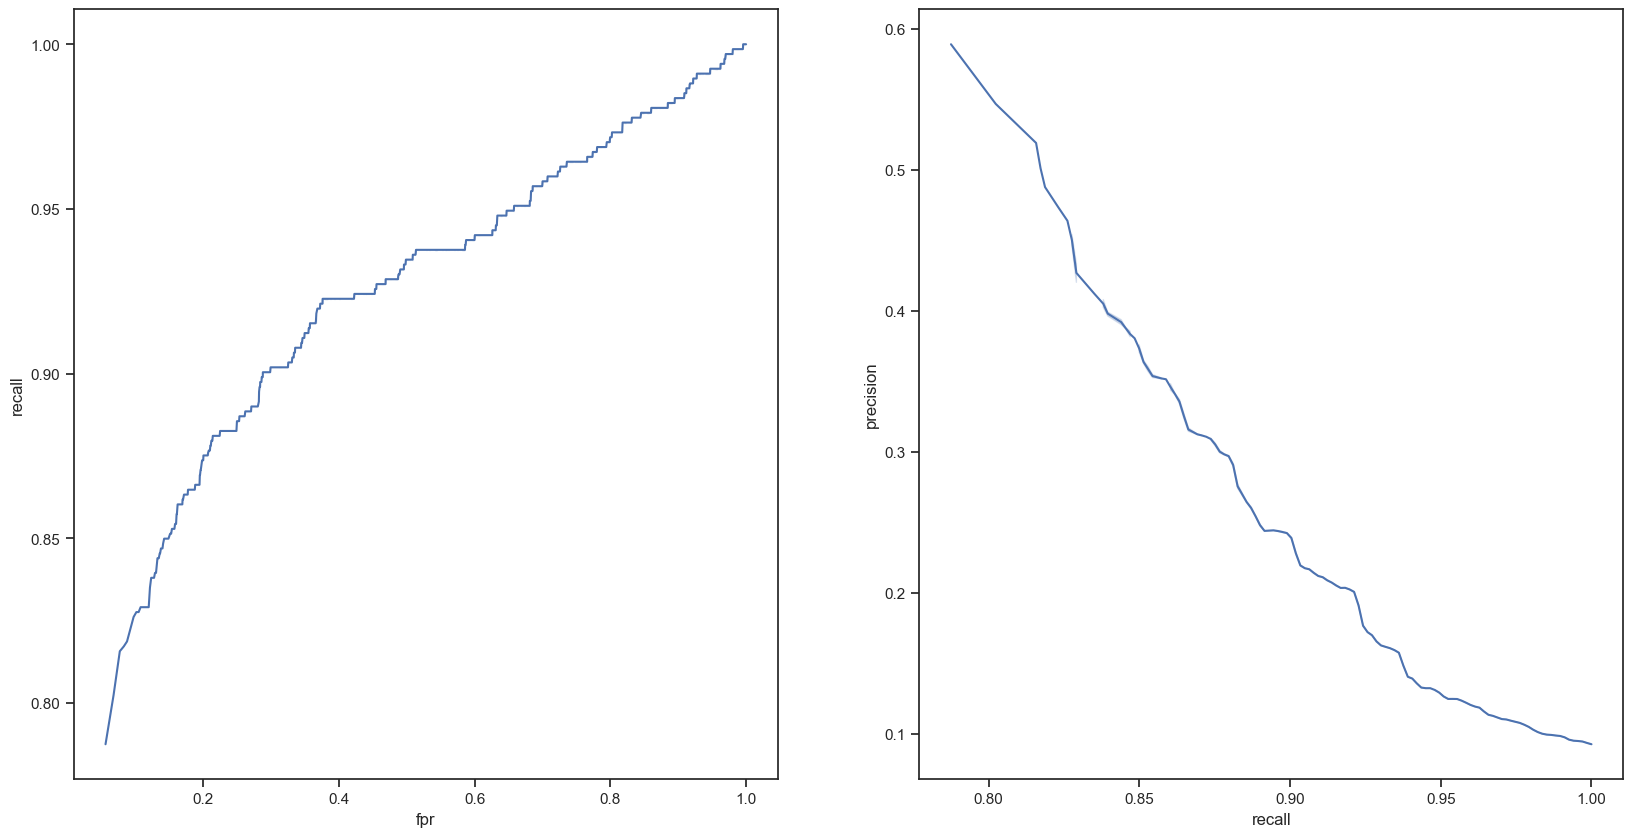

In [9]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="fpr",
    y="recall",
    ax=ax1,
)

sns.lineplot(data=pd.DataFrame(precision_roc_data), x="recall", y="precision", ax=ax2)
fig.figure.set_size_inches(20, 10)

## Paired t-test

In [10]:
import numpy as np
from scipy import stats
import pandas as pd

from dpks.quant_matrix import QuantMatrix


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs3 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs4 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

qm = pd.DataFrame(
    {"Protein": range(len(rvs1)), "s1": rvs1, "s2": rvs2, "s3": rvs3, "s4": rvs4}
)
design = pd.DataFrame(
    {
        "sample": ["s1", "s2", "s3", "s4"],
        "group": [1, 2, 2, 1],
        "pair": ["s2", "s1", "s4", "s3"],
    }
)

quant_matrix = QuantMatrix(qm, design)
compared_data = quant_matrix.compare(
    method="ttest_paired",
    comparisons=(1, 2),
    min_samples_per_group=1,
    level="Protein",
    multiple_testing_correction_method="fdr_tsbh",
)
compared_data.to_df()

,Protein,DEScore1-2,Group1Mean,Group2Mean,Group1Stdev,Group2Stdev,Log2FoldChange1-2,PValue1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue1-2,-Log10CorrectedPValue1-2,s1,s2,s3,s4
0,0,0.181761,1.552054,7.045375,0.459682,13.264188,-5.493321,0.757611,2,2,0.960991,0.017281,2.011735,-6.218814,20.309563,1.092372
1,1,0.087109,16.433380,13.735919,16.247134,4.624046,2.697462,0.918175,2,2,0.983030,0.007433,0.186246,18.359964,9.111873,32.680515
2,2,0.154018,2.667863,7.127772,8.317726,1.119597,-4.459909,0.718949,2,2,0.960991,0.017281,-5.649862,8.247369,6.008174,10.985589
3,3,0.355376,3.182907,13.688748,13.194306,2.240185,-10.505841,0.513296,2,2,0.955870,0.019601,-10.011399,11.448563,15.928933,16.377212
4,4,0.769941,-5.813179,18.102631,6.574061,17.802546,-23.915810,0.506074,2,2,0.955870,0.019601,0.760881,0.300084,35.905177,-12.387240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.229677,1.417927,8.143263,7.169755,3.102892,-6.725336,0.630976,2,2,0.955870,0.019601,8.587682,5.040370,11.246155,-5.751828
496,496,0.179973,5.828146,0.241249,8.875655,14.364657,5.586897,0.849809,2,2,0.960991,0.017281,-3.047509,14.605906,-14.123407,14.703801
497,497,0.186592,-1.312474,3.982662,9.451335,1.011439,-5.295136,0.643290,2,2,0.955870,0.019601,-10.763809,2.971223,4.994101,8.138861
498,498,0.445936,14.282825,5.072287,2.223610,0.125890,9.210538,0.159003,2,2,0.955870,0.019601,12.059216,5.198177,4.946397,16.506435


# Covariate

In [11]:
import numpy as np
from scipy import stats
import pandas as pd

from dpks.quant_matrix import QuantMatrix


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs3 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs4 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

qm = pd.DataFrame(
    {"Protein": range(len(rvs1)), "s1": rvs1, "s2": rvs2, "s3": rvs3, "s4": rvs4}
)
design = pd.DataFrame(
    {
        "sample": ["s1", "s2", "s3", "s4"],
        "group": [1, 2, 2, 1],
        "age": [1, 2, 3, 4],
    }
)

quant_matrix = QuantMatrix(qm, design)
compared_data = quant_matrix.compare(
    method="linregress",
    comparisons=(1, 2),
    min_samples_per_group=1,
    level="Protein",
    multiple_testing_correction_method="fdr_tsbh",
    covariates=["age"],
)
compared_data.to_df()

,Protein,DEScore1-2,Group1Mean,Group2Mean,Group1Stdev,Group2Stdev,Log2FoldChange1-2,PValue1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue1-2,-Log10CorrectedPValue1-2,s1,s2,s3,s4
0,0,0.654600,-3.668447,11.104653,5.712304,2.664806,-14.773100,0.043911,2,2,0.831808,0.079977,2.043857,13.769460,8.439847,-9.380751
1,1,0.270273,-0.004187,8.321296,1.114093,5.762106,-8.325483,0.455347,2,2,0.999631,0.000160,-1.118279,2.559190,14.083402,1.109906
2,2,0.039865,7.247225,5.884509,5.949883,16.434787,1.362716,0.955329,2,2,0.999631,0.000160,1.297342,-10.550278,22.319295,13.197107
3,3,0.159942,-1.468593,2.992422,11.817477,7.821760,-4.461015,0.549149,2,2,0.999631,0.000160,-13.286070,-4.829338,10.814182,10.348884
4,4,0.047375,10.686714,12.254221,7.138618,10.845448,-1.567507,0.912694,2,2,0.999631,0.000160,17.825332,23.099669,1.408773,3.548095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.781799,-12.208382,8.744955,0.779062,1.338253,-20.953336,0.043896,2,2,0.831808,0.079977,-12.987444,7.406701,10.083208,-11.429319
496,496,0.492002,9.349289,-1.395293,8.566480,4.000994,10.744581,0.090445,2,2,0.903412,0.044114,17.915769,2.605702,-5.396287,0.782809
497,497,0.090259,4.769985,7.368368,1.210700,4.654310,-2.598383,0.727834,2,2,0.999631,0.000160,3.559285,2.714058,12.022678,5.980684
498,498,0.132985,0.400982,4.857502,6.784694,7.994350,-4.456519,0.800598,2,2,0.999631,0.000160,-6.383712,12.851851,-3.136848,7.185676
